# Dataless Neural Network for MIS finding in Graphs

## 1. Generate a random dense graph using NetworkX
This will be the graph that we find the MIS of

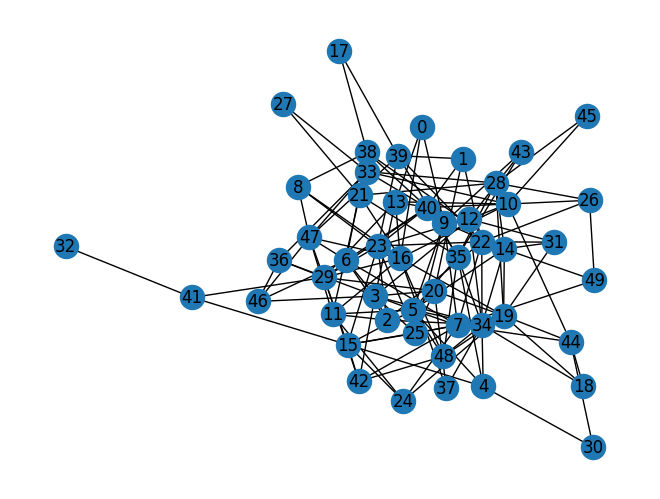

In [12]:
import networkx as nx

NUMBER_OF_NODES = 50
NUMBER_OF_EDGES = 150
SEED = 13

G = nx.generators.dense_gnm_random_graph(NUMBER_OF_NODES, NUMBER_OF_EDGES, seed=SEED)

nx.draw(G,with_labels=True)


# Graph Reduction using linear programming

In [13]:
N_number_of_nodes_org = len(G.nodes)
M_number_of_edges_org = len(G.edges)

###### Question: When we use LP reduction, do we always end up with a reduced graph that consists of disjoint subgraphs?
## Answer: not always

components_before = [G.subgraph(c).copy() for c in nx.connected_components(G)]

## Remove self loops

In [14]:
import numpy as np

################################# remove self loops
self_loop_removal_cntr = 0
for pair in list(G.edges):
    if pair[0] == pair[1]:
        G.remove_edge(pair[0],pair[1])
        self_loop_removal_cntr = self_loop_removal_cntr+1
        print("self loop in node {} is removed".format([pair[0]]))
print("ALREADY REMOVED {} EDGES BECAUSE OF SELF LOOP".format(self_loop_removal_cntr))

ALREADY REMOVED 0 EDGES BECAUSE OF SELF LOOP


## Perform LP using CPlex

In [15]:
import cplex

#############################################################
################### LP ###################
#############################################################
########## INPUT: G
########## set of x_n = 1

problem = cplex.Cplex()

list_of_nodes = list(G.nodes)
list_of_pairs_of_edges = list(G.edges)

### dictionary of id's
node_id = {(n): 'node_id({0})'.format(n) for (n) in list_of_nodes}
problem.objective.set_sense(problem.objective.sense.maximize)
problem.variables.add(names=list(node_id.values()),lb=[0.0]*len(node_id))

## objective:
problem.objective.set_linear(list(zip(list(node_id.values()), [1.0] * len(node_id))))

## constraint: for all (u,v)\in E, node_id(u) + node_id(v) <= 1
""" Constraint (1) """
for (u,v) in list_of_pairs_of_edges:
    #if u != v:
    lin_expr_vars_1 = []
    lin_expr_vals_1 = []
    lin_expr_vars_2 = []
    lin_expr_vals_2 = []
    lin_expr_vars_1.append(node_id[(u)])
    lin_expr_vals_1.append(1.0)
    lin_expr_vars_2.append(node_id[(v)])
    lin_expr_vals_2.append(1.0)
    problem.linear_constraints.add(lin_expr=[
        cplex.SparsePair(lin_expr_vars_1 + lin_expr_vars_2, val=lin_expr_vals_2 + lin_expr_vals_2)],
        rhs=[1.0], senses=["L"],
        names=['(1)_'])


## write program for testing
#problem.write("LP_test.lp")
problem.solve()

if problem.solution.get_solution_type() == 0:
    print("CPLEX is outputting no solution exists")
if problem.solution.get_solution_type() != 0:

    node_id_star = problem.solution.get_values()
    ### removing nodes in (node_id_star == 1) along with their nieghbors
    nodes_to_be_removed = np.where(np.array(node_id_star)==1)

    if len(nodes_to_be_removed[0])==0:
        print("############# LP is solved , BUT without any nodes to be removed ##############")

    nodes_removed_from_LP_reduction=[]
    for node in nodes_to_be_removed[0]:
        # if node is still in graph
        if node in G.nodes:
            # find nieghbors
            nieghbor_list = list(G[int(node)])
            # remove node
            G.remove_node(node)
            nodes_removed_from_LP_reduction.append(node)
            print("LP removing ", node)
            for nie_node in nieghbor_list:
                G.remove_node(nie_node)
                nodes_removed_from_LP_reduction.append(nie_node)
                print("LP removing ", nie_node, "since its a nieghbor of", node)

    if len(G.nodes) == 0:
        print("THIS IS a CASE where a MIS is found with the LP with cardinality = ", np.count_nonzero(node_id_star))


    # re-label reduced graph from 0 to N
    G = nx.relabel.convert_node_labels_to_integers(G)

    ### number to be added to the final MIS of the reduced graph is:
    print("NUMBER of nodes in the MIS that we got from the LP", len(nodes_to_be_removed[0]))

#######################################################################################################################
#######################################################################################################################
#######################################################################################################################

N_number_of_nodes = len((G.nodes))
M_number_of_edges = len((G.edges))

M_number_of_edges_comp = (N_number_of_nodes*(N_number_of_nodes-1)/2) - M_number_of_edges

print("Before LP {} - After LP  {}".format([N_number_of_nodes_org, M_number_of_edges_org],[N_number_of_nodes, M_number_of_edges]))

components_after = [G.subgraph(c).copy() for c in nx.connected_components(G)]

print(f"number of dis-joint subgraphs of G = [Before LP: {len(components_before)}, After LP: {len(components_after)}]")

Version identifier: 22.1.1.0 | 2023-02-11 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 2 rows and 1 columns.
Aggregator did 1 substitutions.
Reduced LP has 147 rows, 48 columns, and 294 nonzeros.
Presolve time = 0.00 sec. (0.11 ticks)

Iteration log . . .
Iteration:     1   Dual infeasibility =            44.000000
Iteration:    28   Dual objective     =            29.000000
LP removing  32
LP removing  41 since its a nieghbor of 32
NUMBER of nodes in the MIS that we got from the LP 1
Before LP [50, 150] - After LP  [48, 147]
number of dis-joint subgraphs of G = [Before LP: 1, After LP: 1]


# NN Generation

P Desired [-1152.]
training_step = 0 --- value = 278.0967 --- desired value set for optimization = -1152.0
training_step = 1 --- value = 245.1126 --- desired value set for optimization = -1152.0
training_step = 2 --- value = 217.7321 --- desired value set for optimization = -1152.0
training_step = 3 --- value = 193.1921 --- desired value set for optimization = -1152.0
training_step = 4 --- value = 168.3942 --- desired value set for optimization = -1152.0
training_step = 5 --- value = 146.0805 --- desired value set for optimization = -1152.0
training_step = 6 --- value = 126.7269 --- desired value set for optimization = -1152.0
training_step = 7 --- value = 109.6303 --- desired value set for optimization = -1152.0
training_step = 8 --- value = 94.4907 --- desired value set for optimization = -1152.0
training_step = 9 --- value = 80.6912 --- desired value set for optimization = -1152.0
training_step = 10 --- value = 69.0528 --- desired value set for optimization = -1152.0
training_step =

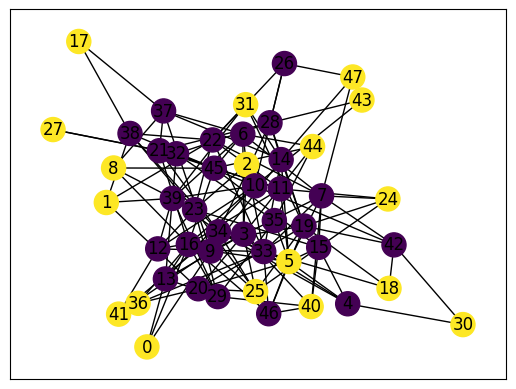

In [16]:
import torch
import numpy
import time
from datalessNN import datalessNN_graph_params, datalessNN_module
from layer_constraints import ZeroOneClamp

initial_learning_rate = 0.01
training_steps = 3500

## generate graph weights
NN_graph_params = datalessNN_graph_params(G)

graph_order = len(G.nodes)

NN = datalessNN_module(
    NN_graph_params["theta_tensor"],
    NN_graph_params["layer_2_weights"],
    NN_graph_params["layer_2_biases"],
    NN_graph_params["layer_3_weights"])

################# optimization
# good and fast results on most is found at initial_learning_rate = 0.001
optimizer = torch.optim.Adam(NN.parameters(), lr=initial_learning_rate)
loss_fn = torch.nn.MSELoss()

theta_constraint = ZeroOneClamp()

##################################################################################################
##################################################################################################
##################################################################################################

batch_size_gen = 1
batch_size_2 = batch_size_gen

################################################################
##### X_train is the same for both gen and combined models #####
################################################################

X_train = numpy.ones(len(NN_graph_params["theta_tensor"]))

############################################################
### Y_train_combined is the v_d (desired value)
################################################################

P_desired = numpy.zeros(1)
P_desired[0] = -graph_order**2 / 2

print("P Desired", P_desired)

Y_train_combined = numpy.zeros(shape=(batch_size_2, 1, 1))

Y_val_combined = P_desired.reshape(1, 1)
for i in range(batch_size_2):
    Y_train_combined[i, :, :] = Y_val_combined

Y_train_combined = Y_train_combined.reshape(batch_size_2, 1)

Y_desired = torch.Tensor(Y_val_combined)
Y_val_combined = Y_val_combined.reshape(1, 1, 1)
Y_val_combined = Y_val_combined.reshape(1, 1)
# Y_val_combined = Y_val_combined.reshape(3)

################################################################
### train
################################################################
X_star = None

start = time.time()
for i in range(training_steps):
    predicted_y = NN(X_train)

    loss = loss_fn(predicted_y, Y_desired)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ## normalize theta values between 0 and 1
    NN[0].apply(theta_constraint)

    X_star = NN[0].weight

    if any(X_star > 1.0) or any(X_star < 0.0):
        print(f"exit AT training step = {i} --- THERE IS A A VALUE IN THE WEIGHTS OUTSIDE [0,1] --- x_star = {X_star}")
        break

    print(f"training_step = {i} --- value = {predicted_y.item():.4f} --- desired value set for optimization = {P_desired[0]}")


x_star = X_star.detach().numpy()

greater_than_09 = (x_star > 0.9).sum()
print(f"Size of MIS (theta > 0.9): {greater_than_09 + nodes_to_be_removed[0]}")
nx.draw_networkx(G, node_color=x_star)